In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('yelp.csv')

In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
print('Shape of dataset: ', df.shape)

Shape of dataset:  (10000, 10)


In [11]:
print('Column names: \n', df.columns)

Column names: 
 Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [16]:
# Are these columns rated 1-5? Can't tell from df.head()
print('Funny max:', max(df['funny']))
print('Useful max:',max(df['useful']))
print('Cool max:',max(df['cool']))

Funny max: 57
Useful max: 76
Cool max: 77


In [23]:
print('Funny avg:', np.mean(df['funny']))
print('Useful avg:', np.mean(df['useful']))
print('Cool avg:', np.mean(df['cool']))

Funny avg: 0.7013
Useful avg: 1.4093
Cool avg: 0.8768


In [24]:
# Add a column to our dataframe that includes word length of the review
df['review_length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [25]:
df.describe()

,stars,cool,useful,funny,review_length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


Weird that the average values for funny, useful, and cool are between 0-2 but there seem to be some strong outliers. Will need to read more about the dataset and how these values are determined.

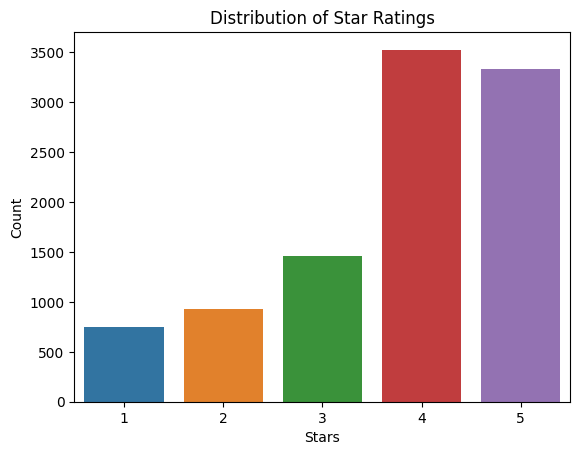

In [17]:
# Let's look at how the stars are distributed
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

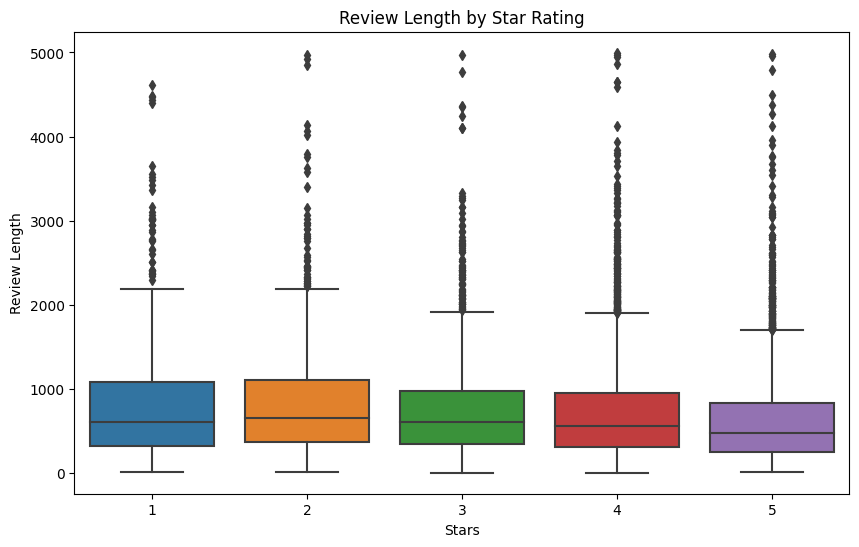

In [18]:
# Check to see if longer review correlates with higher or lower rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='review_length', data=df)
plt.title('Review Length by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Review Length')
plt.show()

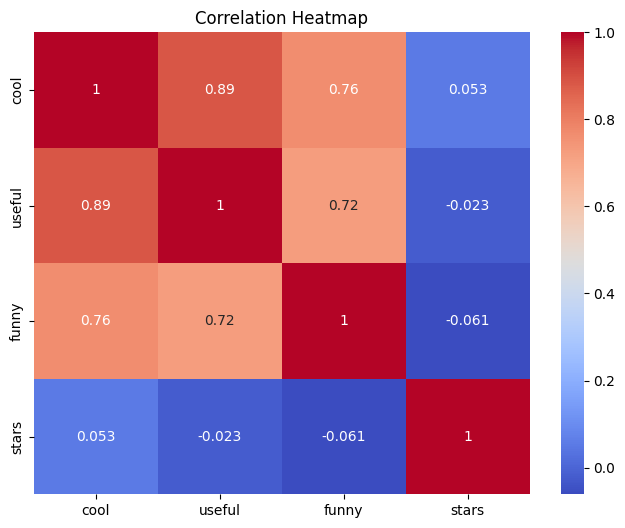

In [19]:
# Correlation heatmap between cool useful funny and stars
correlation_matrix = df[['cool', 'useful', 'funny', 'stars']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Interesting, it appears there is a NEGATIVE correlation with 'useful' and 'funny' ratings, and a POSITIVE correlation with 'cool' ratings. These three correlations are weak though.

The strongest correlations are between funny,
useful, AND cool. This means that if a review is considered funny it is also more likely to be rated cooler and more useful.

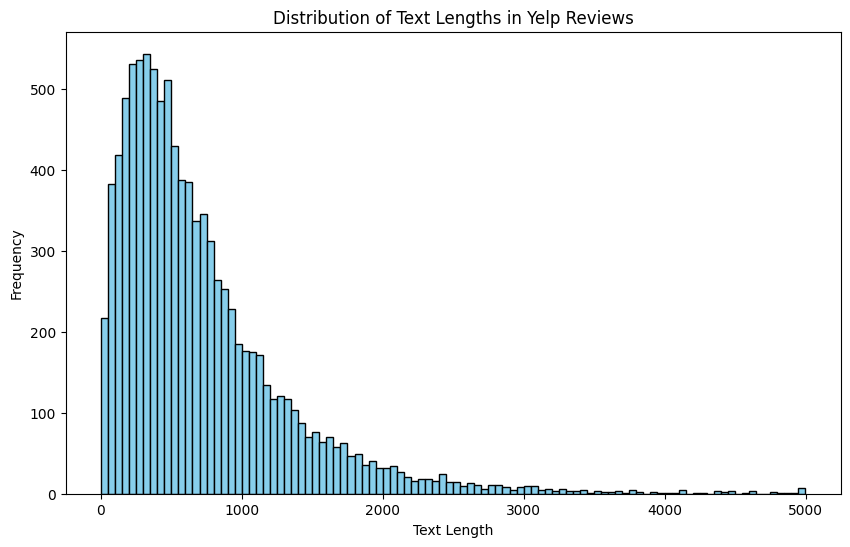

In [32]:
# Assuming df is your DataFrame containing the Yelp reviews
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths in Yelp Reviews')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# TODO: Word cloud -- before or after removing stop words?